**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import and Load the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/hotel_booking.csv'
df = pd.read_csv(file_path)

**Initial Data Overview**

In [4]:
df.head() # display first 5 rows in the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
df.info() #display data types and null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.shape # total data rows and columns

(119390, 36)

In [8]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [9]:
df = df.drop(columns=['name', 'email', 'phone-number', 'credit_card']) # drop personal identifiable columns for privacy

missing = df.isnull().sum().sort_values(ascending=False)

df['children'] = df['children'].fillna(0) #replacing all missing vals with 0
df['country'] = df['country'].fillna('Unknown') #replace missing vals with Unknown
df['agent'] = df['agent'].fillna(0) #missing agentID = customer booked directly so, use 0 = no agent
df['company'] = df['company'].fillna(0) #missing companyID = no company involved so use 0 = not associated with any company

# convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) #enables time-based analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

**Feature Engineering**

In [56]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] +df['babies']

**Identifying Cancellation Trends**

Cancellation Trends:  is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


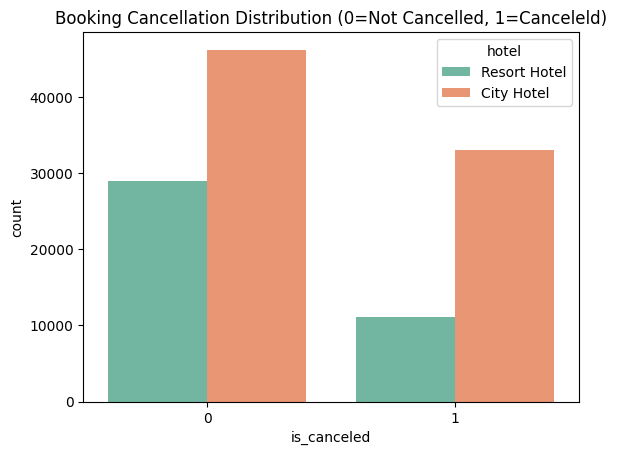

In [75]:
# Cancellation count
cancel_counts = df['is_canceled'].value_counts(normalize=True)
print('Cancellation Trends: ', cancel_counts)

sns.countplot(data=df, x='is_canceled', palette='Set2', hue='hotel') # show how cancellations differ b/w city and resort hotels
plt.title("Booking Cancellation Distribution (0=Not Cancelled, 1=Canceleld)")
plt.show()

**Impact of Lead Time on Cancellations**

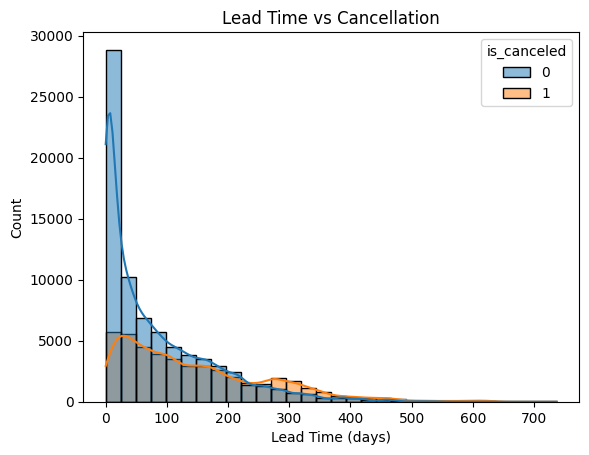

In [20]:
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=30, kde=True)
plt.title("Lead Time vs Cancellation")
plt.xlabel("Lead Time (days)")
plt.ylabel("Count")
plt.show() #long lead times often indicate higher cancellation likelihood

**Monthly Booking Trend**

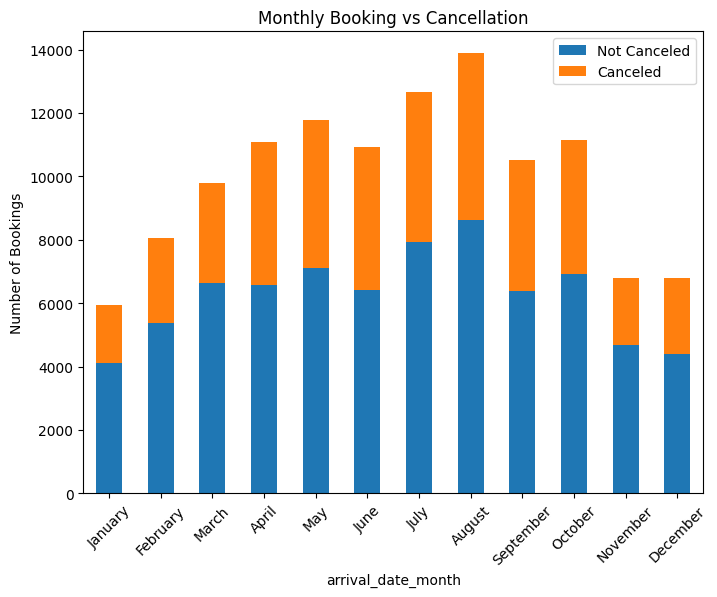

In [21]:
# seasonal pricing strategy
monthly_data = df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack().fillna(0) # count bookings per month

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December'] #order of months
monthly_data = monthly_data.reindex(month_order)

# to observe if certain months have more cancellations or bookings.
monthly_data.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Monthly Booking vs Cancellation")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.legend(["Not Canceled", "Canceled"])
plt.show()

**Customer Preferrence**

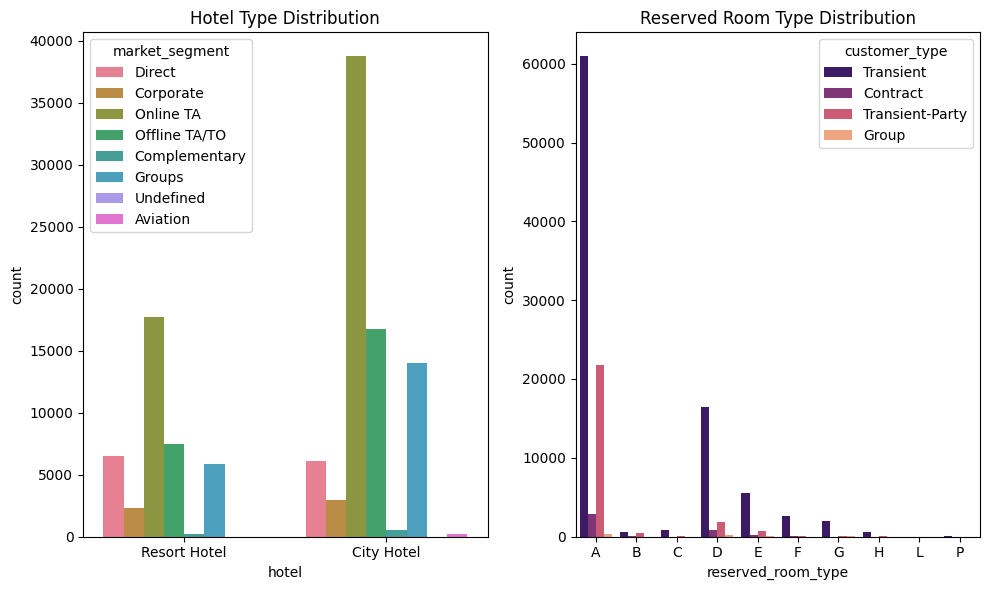

In [29]:
# identifying popular room types, hotel types etc
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='market_segment', ax=axs[0], palette='husl') #hue->show how each type of guest is distributed across hotel types
axs[0].set_title("Hotel Type Distribution")

sns.countplot(data=df, x='reserved_room_type',  hue='customer_type', order=sorted(df['reserved_room_type'].unique()), ax=axs[1], palette='magma') #hue->which customer types prefer which room types.
axs[1].set_title("Reserved Room Type Distribution")
plt.tight_layout()
plt.show()

**Cancellation by Market Segment**

market_segment
Undefined        1.000000
Groups           0.610620
Online TA        0.367211
Offline TA/TO    0.343160
Aviation         0.219409
Corporate        0.187347
Direct           0.153419
Complementary    0.130552
Name: is_canceled, dtype: float64


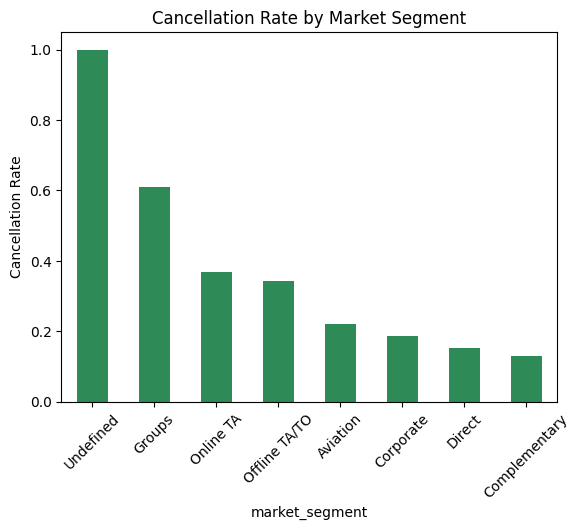

In [73]:
# Visualize Cancellation Rate by Market Segment (Directly shows propensity to cancel)
segment_cancel = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False) # identify market segments are more likely to cancel
print(segment_cancel)

segment_cancel.plot(kind='bar', color='seagreen')
plt.title("Cancellation Rate by Market Segment")
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate")
plt.show()

# The 'Undefined' market segment shows a high cancellation rate, likely due to missing or improperly recorded market segment information.
# Improving data collection and categorization processes for markets could help reduce this ambiguity.

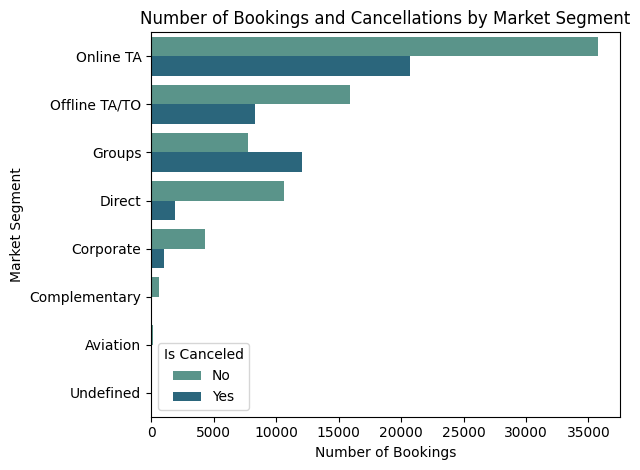

In [71]:
# Visualize Cancellation Counts by Market Segment (Shows the volume of cancellations)
sns.countplot(data=df, y='market_segment', order=df['market_segment'].value_counts().index, hue='is_canceled', palette='crest')
plt.title("Number of Bookings and Cancellations by Market Segment")
plt.ylabel("Market Segment")
plt.xlabel("Number of Bookings")
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

**Average Daily Rate(ADR) Trend**

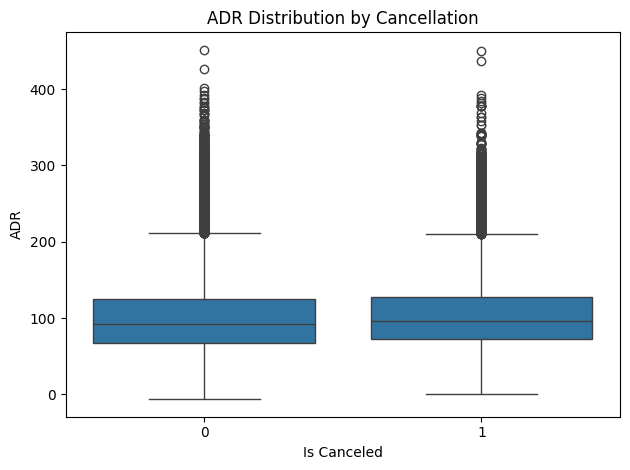

In [36]:
# identify if pricing influences cancellations
sns.boxplot(data=df[df['adr'] < 500], x='is_canceled', y='adr') #filter out outliers(extrem values that are rare)

plt.title("ADR Distribution by Cancellation")
plt.xlabel("Is Canceled")
plt.ylabel("ADR")
plt.tight_layout()
plt.show()

**Booking Duration vs Special Request**

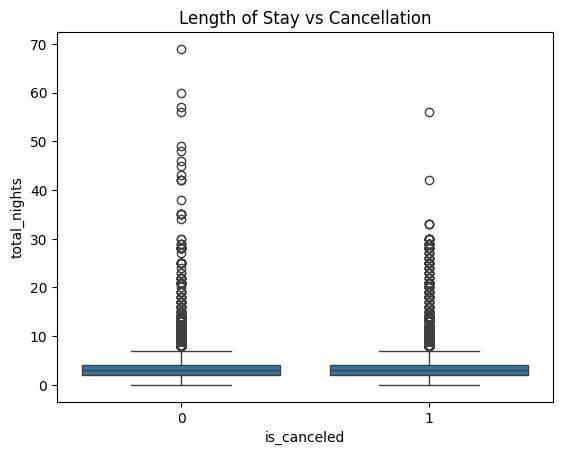

In [55]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# longer stays = show different behavior
sns.boxplot(data=df, x='is_canceled', y='total_nights')
plt.title("Length of Stay vs Cancellation")
plt.show()

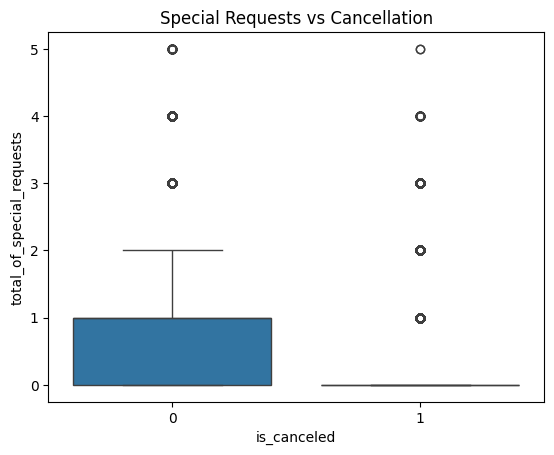

In [40]:
# special requests = indicate seriousness in booking.
sns.boxplot(data=df, x='is_canceled', y='total_of_special_requests')
plt.title("Special Requests vs Cancellation")
plt.show()

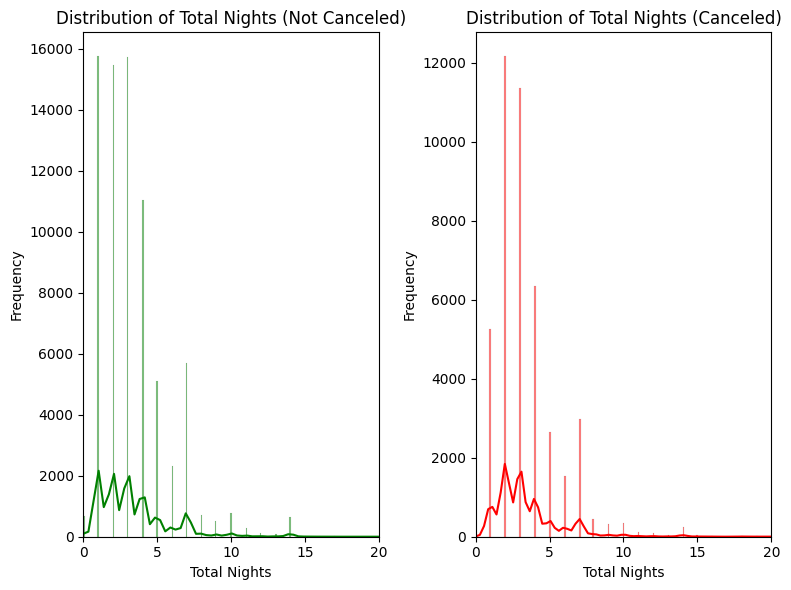

In [76]:
# Visualize the distributions more directly using histograms or KDE plots
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df[df['is_canceled'] == 0], x='total_nights', kde=True, color='green')
plt.title('Distribution of Total Nights (Not Canceled)')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Limit to focus on typical stay lengths

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['is_canceled'] == 1], x='total_nights', kde=True, color='red')
plt.title('Distribution of Total Nights (Canceled)')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.xlim(0, 20)

plt.tight_layout()
plt.show()


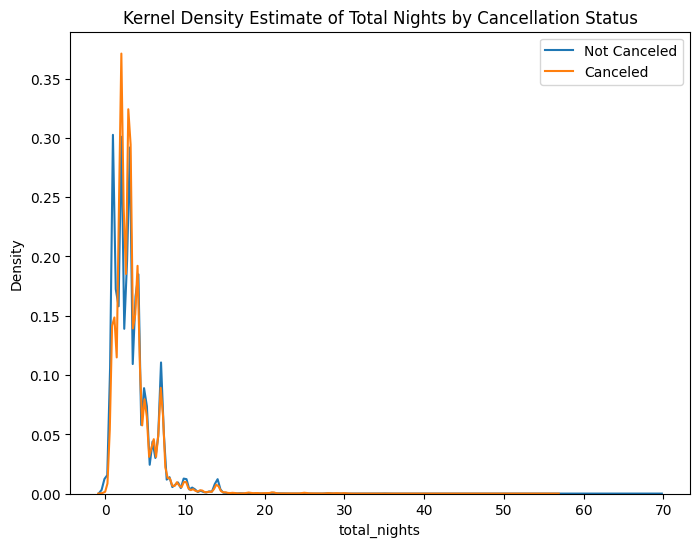

In [50]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['is_canceled'] == 0], x='total_nights', label='Not Canceled')
sns.kdeplot(data=df[df['is_canceled'] == 1], x='total_nights', label='Canceled')
plt.title('Kernel Density Estimate of Total Nights by Cancellation Status')
plt.xlabel('total_nights')
plt.ylabel('Density')
plt.legend()
plt.show()

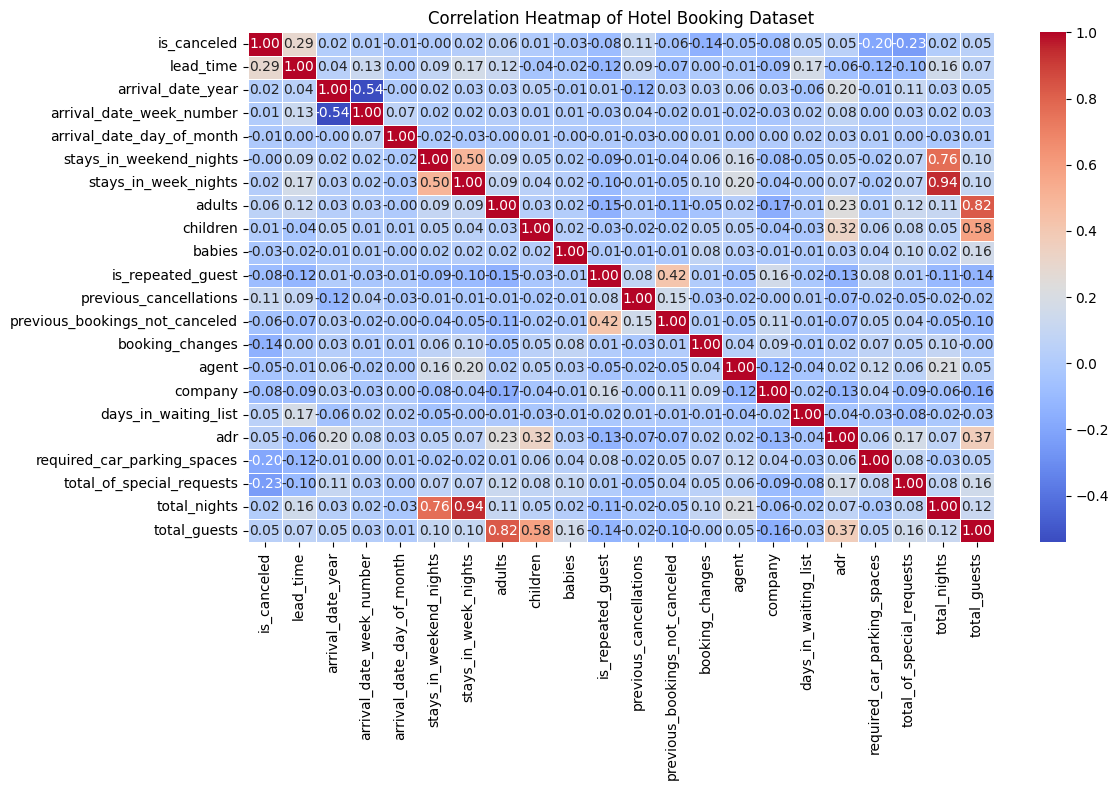

In [74]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Hotel Booking Dataset')
plt.tight_layout()
plt.show()

**Numerical Summaries of the Distributions**

In [53]:
print("Descriptive Statistics by Cancellation Status")
print(df.groupby('is_canceled')['total_nights'].describe())

print("\n\n Median Length of Stay by Cancellation Status")
print(df.groupby('is_canceled')['total_nights'].median()) #used median bcz it is less sensitive to outliers than mean

print("\n\n Value Counts of Total Nights (Top few) by Cancellation Status")
print(df.groupby('is_canceled')['total_nights'].value_counts().head()) #identifying popular stay durations and cancellation behavior

Descriptive Statistics by Cancellation Status
               count      mean       std  min  25%  50%  75%   max
is_canceled                                                       
0            75166.0  3.393023  2.577671  0.0  2.0  3.0  4.0  69.0
1            44224.0  3.487179  2.521601  0.0  2.0  3.0  4.0  56.0


 Median Length of Stay by Cancellation Status
is_canceled
0    3.0
1    3.0
Name: total_nights, dtype: float64


 Value Counts of Total Nights (Top few) by Cancellation Status
is_canceled  total_nights
0            1               15749
             3               15725
             2               15480
             4               11025
             7                5686
Name: count, dtype: int64
